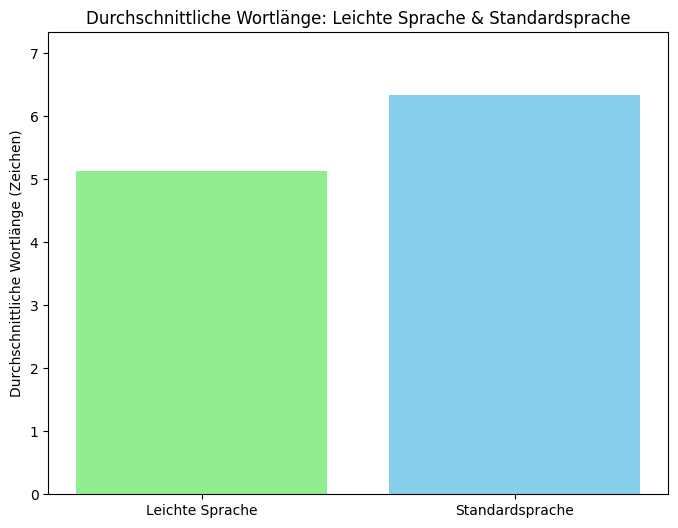

In [136]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Excel file
file_path = 'parallel_corpus.xlsx'
df = pd.read_excel(file_path, header=None)

# Assume that the first column contains the Leichte Sprache texts and the second column contains the Standardsprache texts
df.columns = ["Leichte Sprache", "Standardsprache", "HIX Leichte Sprache", "HIX Standardsprache", "HIX Nicht-KI Nachrichten", "Nicht-KI Nachrichten"]

# Function to split words, including the custom split on '·'
def custom_word_split(text):
    # Replace the middle dot with a space to split compound words
    modified_text = str(text).replace('·', ' ')
    words = modified_text.split()
    return sum(len(word) for word in words) / len(words) if words else 0

# Calculate the average word length for each text in both columns
df['Leichte Sprache Wortlänge (mit Split)'] = df['Leichte Sprache'].apply(custom_word_split)
df['Standardsprache Wortlänge'] = df['Standardsprache'].apply(custom_word_split)

# Calculate the overall average word length for both Leichte Sprache (with split) and Standardsprache
average_word_length_ls_split = df['Leichte Sprache Wortlänge (mit Split)'].mean()
average_word_length_std_split = df['Standardsprache Wortlänge'].mean()

# Plotting the adjusted average word length comparison
labels = ['Leichte Sprache', 'Standardsprache']
word_lengths_split = [average_word_length_ls_split, average_word_length_std_split]

plt.figure(figsize=(8, 6))
plt.bar(labels, word_lengths_split, color=['lightgreen', 'skyblue'])
plt.title('Durchschnittliche Wortlänge: Leichte Sprache & Standardsprache')
plt.ylabel('Durchschnittliche Wortlänge (Zeichen)')
plt.ylim(0, max(word_lengths_split) + 1)
plt.show()

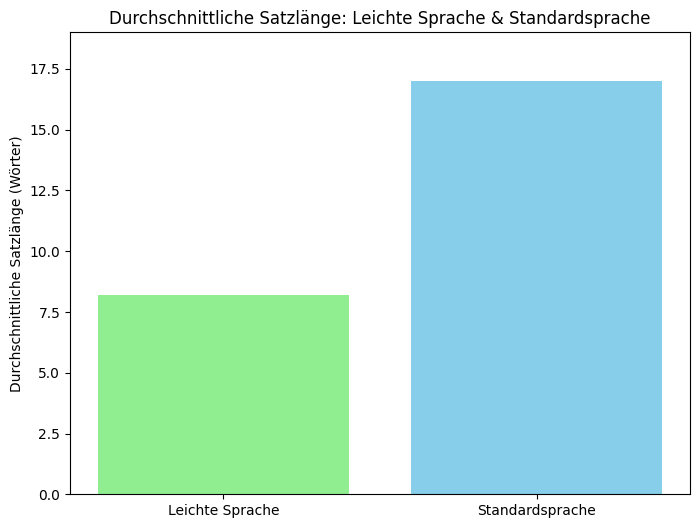

In [137]:
# Function to split sentences and calculate their lengths
def sentence_length_analysis(text):
    # Split the text into sentences using basic punctuation marks ('.', '?', '!')
    sentences = [sentence.strip() for sentence in str(text).replace('·', ' ').replace('\n', ' ').split('.') if sentence]
    sentence_lengths = [len(sentence.split()) for sentence in sentences]
    return sum(sentence_lengths) / len(sentence_lengths) if sentence_lengths else 0

# Apply the sentence length analysis for both columns
df['Leichte Sprache Satzlänge'] = df['Leichte Sprache'].apply(sentence_length_analysis)
df['Standardsprache Satzlänge'] = df['Standardsprache'].apply(sentence_length_analysis)

# Calculate the overall average sentence length for both Leichte Sprache and Standardsprache
average_sentence_length_ls = df['Leichte Sprache Satzlänge'].mean()
average_sentence_length_std = df['Standardsprache Satzlänge'].mean()

# Plotting the average sentence length comparison
labels = ['Leichte Sprache', 'Standardsprache']
sentence_lengths = [average_sentence_length_ls, average_sentence_length_std]

plt.figure(figsize=(8, 6))
plt.bar(labels, sentence_lengths, color=['lightgreen', 'skyblue'])
plt.title('Durchschnittliche Satzlänge: Leichte Sprache & Standardsprache')
plt.ylabel('Durchschnittliche Satzlänge (Wörter)')
plt.ylim(0, max(sentence_lengths) + 2)
plt.show()

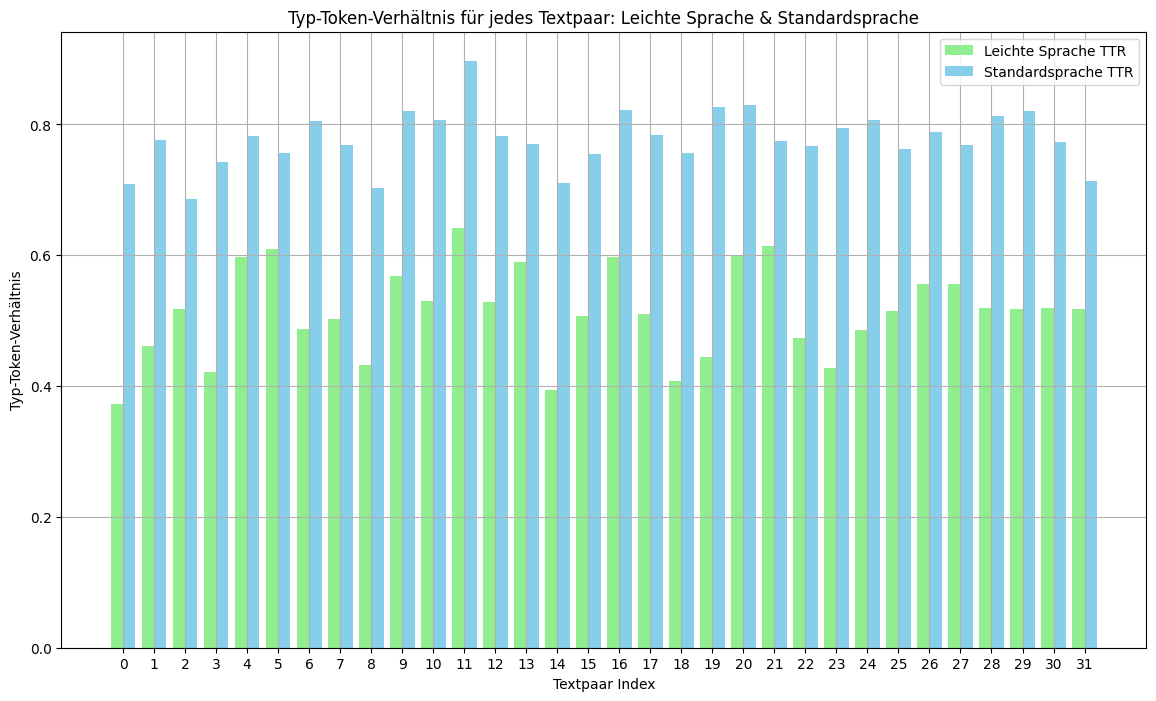

In [138]:
import string

# Function to calculate the Type-Token Ratio (TTR)
def type_token_ratio(text):
    text = text.translate(str.maketrans('', '', string.punctuation))
    words = str(text).split()
    if len(words) == 0:
        return 0
    unique_words = set(words)
    return len(unique_words) / len(words)

# Apply the TTR analysis for both columns
df['Leichte Sprache TTR'] = df['Leichte Sprache'].apply(type_token_ratio)
df['Standardsprache TTR'] = df['Standardsprache'].apply(type_token_ratio)

# Create a DataFrame suitable for bar plotting
ttr_comparison_df = pd.DataFrame({
    'Textpaar Index': df.index,
    'Leichte Sprache TTR': df['Leichte Sprache TTR'],
    'Standardsprache TTR': df['Standardsprache TTR']
})

# Set up the plot
plt.figure(figsize=(14, 8))

# Plot bars side by side for each text pair
bar_width = 0.4
indices = ttr_comparison_df['Textpaar Index']

plt.bar(indices - bar_width/2, ttr_comparison_df['Leichte Sprache TTR'], width=bar_width, color='lightgreen', label='Leichte Sprache TTR')
plt.bar(indices + bar_width/2, ttr_comparison_df['Standardsprache TTR'], width=bar_width, color='skyblue', label='Standardsprache TTR')

# Adding titles and labels
plt.title('Typ-Token-Verhältnis für jedes Textpaar: Leichte Sprache & Standardsprache')
plt.xlabel('Textpaar Index')
plt.ylabel('Typ-Token-Verhältnis')
plt.xticks(indices)  
plt.legend()
plt.grid(True)

plt.show()

/var/folders/tw/xvzk3_1j5wq8c2hd1nsmz4qw0000gn/T/ipykernel_10429/168699456.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Sprache', y='HIX', data=hix_df, palette=['lightgreen', 'skyblue'])
/var/folders/tw/xvzk3_1j5wq8c2hd1nsmz4qw0000gn/T/ipykernel_10429/168699456.py:9: UserWarning: 
The palette list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(x='Sprache', y='HIX', data=hix_df, palette=['lightgreen', 'skyblue'])


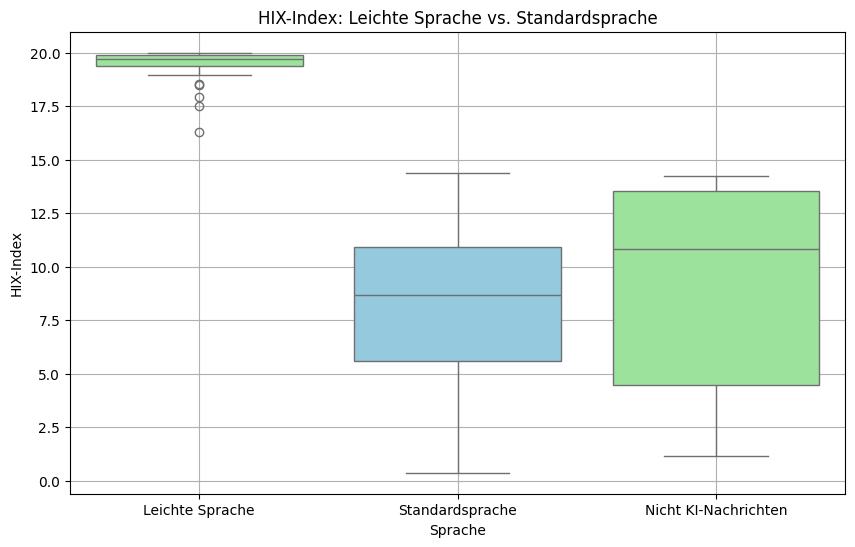

In [139]:

# Create a DataFrame for HIX values
hix_df = pd.DataFrame({
    'Sprache': ['Leichte Sprache'] * len(df) + ['Standardsprache'] * len(df) + ['Nicht KI-Nachrichten'] * len(df),
    'HIX': list(df['HIX Standardsprache']) + list(df['HIX Leichte Sprache']) + list(df['HIX Nicht-KI Nachrichten'])
})

# Create a boxplot for the HIX values
plt.figure(figsize=(10, 6))
sns.boxplot(x='Sprache', y='HIX', data=hix_df, palette=['lightgreen', 'skyblue'])
plt.title('HIX-Index: Leichte Sprache vs. Standardsprache')
plt.ylabel('HIX-Index')
plt.grid(True)

plt.show()

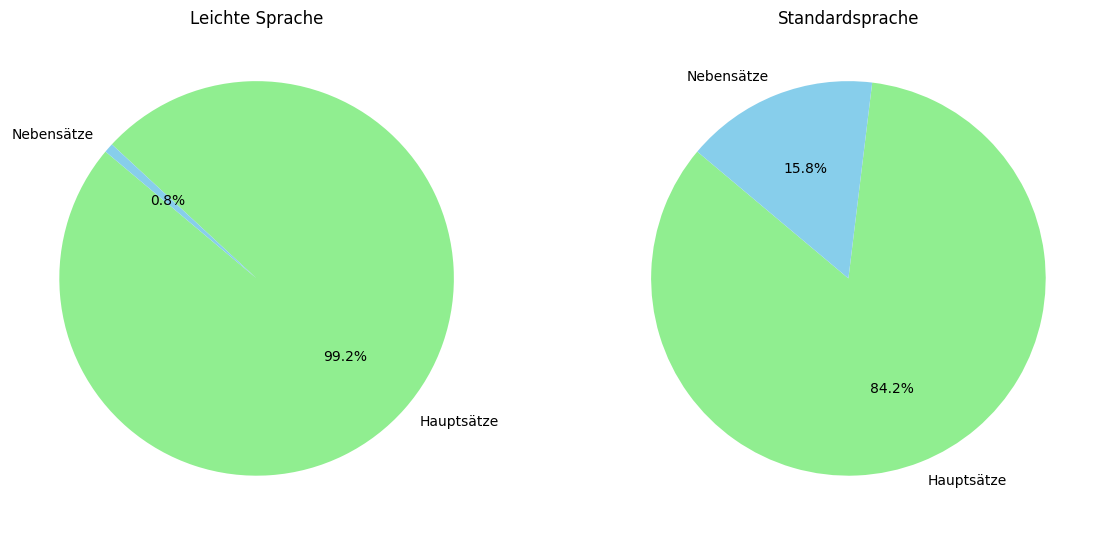

In [140]:
import re
from collections import Counter

# Function to count main clauses and subordinate clauses based on simple regex
def count_clauses(text):
    # Rough estimation: counting the occurrences of subordinating conjunctions and relative pronouns
    subordinating_conjunctions = ['dass', 'weil', 'obwohl', 'während', 'wenn', 'da', 'als', 'bevor', 'nachdem', 'sobald', 'solange', 'damit']
    conjunctions_regex = r'\b(?:' + '|'.join(subordinating_conjunctions) + r')\b'
    
    # Count number of sentences
    sentences = re.split(r'[.!?]', str(text))
    num_sentences = len(sentences) if sentences[-1] != '' else len(sentences) - 1
    
    # Count number of subordinating conjunctions (approximation for subordinate clauses)
    subordinate_clauses = sum(len(re.findall(conjunctions_regex, sentence)) for sentence in sentences)
    
    # Main clauses are roughly the difference between total sentences and subordinate clauses
    main_clauses = max(0, num_sentences - subordinate_clauses)
    
    return main_clauses, subordinate_clauses

# Apply clause counting to both Leichte Sprache and Standardsprache texts
df['Hauptsätze Leichte Sprache'], df['Nebensätze Leichte Sprache'] = zip(*df['Leichte Sprache'].apply(count_clauses))
df['Hauptsätze Standardsprache'], df['Nebensätze Standardsprache'] = zip(*df['Standardsprache'].apply(count_clauses))

# Summarize the counts
main_clauses_ls = df['Hauptsätze Leichte Sprache'].sum()
subordinate_clauses_ls = df['Nebensätze Leichte Sprache'].sum()
main_clauses_std = df['Hauptsätze Standardsprache'].sum()
subordinate_clauses_std = df['Nebensätze Standardsprache'].sum()

# Preparing data for pie charts
labels = ['Hauptsätze', 'Nebensätze']
colors = ['lightgreen', 'skyblue']

# Pie chart for Leichte Sprache
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.pie([main_clauses_ls, subordinate_clauses_ls], labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Leichte Sprache')

# Pie chart for Standardsprache
plt.subplot(1, 2, 2)
plt.pie([main_clauses_std, subordinate_clauses_std], labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Standardsprache')

plt.show()

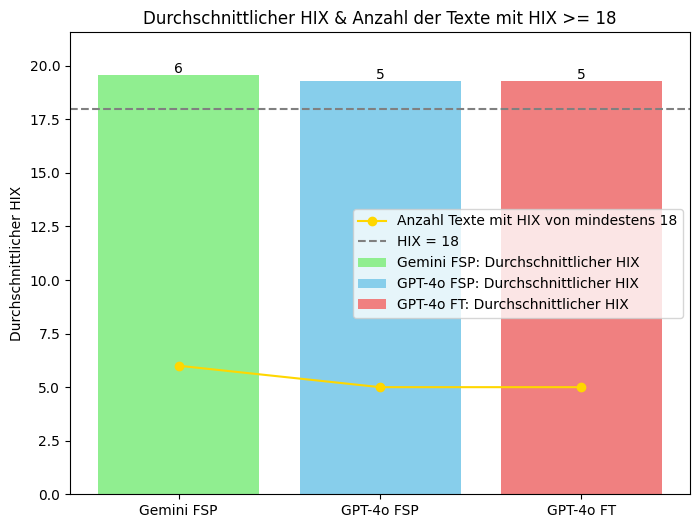

In [146]:
# Load the Excel file and select the sheet
file_path = 'evaluation.xlsx'
evaluation_data = pd.read_excel(file_path, sheet_name='Tabelle1')

# Calculate the average HIX values for each model
avg_hix_gemini = evaluation_data['HIX_Gemini_FSP'].mean()
avg_hix_gpt4_fsp = evaluation_data['HIX_GPT_FSP'].mean()
avg_hix_gpt4_ft = evaluation_data['HIX_GPT_FT'].mean()

# Count how many times the HIX value is >= 18 (including 17.99)
count_hix_gemini = (evaluation_data['HIX_Gemini_FSP'] >= 17.99).sum()
count_hix_gpt4_fsp = (evaluation_data['HIX_GPT_FSP'] >= 17.99).sum()
count_hix_gpt4_ft = (evaluation_data['HIX_GPT_FT'] >= 17.99).sum()

# Data for visualization
models = ['Gemini FSP', 'GPT-4o FSP', 'GPT-4o FT']
avg_hix_values = [avg_hix_gemini, avg_hix_gpt4_fsp, avg_hix_gpt4_ft]
count_hix_values = [count_hix_gemini, count_hix_gpt4_fsp, count_hix_gpt4_ft]

# Create the bar chart for average HIX values
plt.figure(figsize=(8, 6))
bars1 = plt.bar(models[0], avg_hix_values[0], color='lightgreen', label='Gemini FSP: Durchschnittlicher HIX')
bars2 = plt.bar(models[1], avg_hix_values[1], color='skyblue', label='GPT-4o FSP: Durchschnittlicher HIX')
bars3 = plt.bar(models[2], avg_hix_values[2], color='lightcoral', label='GPT-4o FT: Durchschnittlicher HIX')

# Plot the count of HIX >= 18 as a line plot over the bars
plt.plot(models, count_hix_values, color='gold', marker='o', label='Anzahl Texte mit HIX von mindestens 18')

# Adding text annotation for the count of HIX >= 18
for i, count in enumerate(count_hix_values):
    plt.text(i, avg_hix_values[i] + 0.1, str(count), ha='center', color='black')

# Draw a horizontal line at HIX value of 18
plt.axhline(y=18, color='gray', linestyle='--', label='HIX = 18')

# Titles and labels
plt.title('Durchschnittlicher HIX & Anzahl der Texte mit HIX >= 18')
plt.ylabel('Durchschnittlicher HIX')
plt.ylim(0, max(avg_hix_values) + 2)

# Show the legend
plt.legend()

# Display the plot
plt.show()

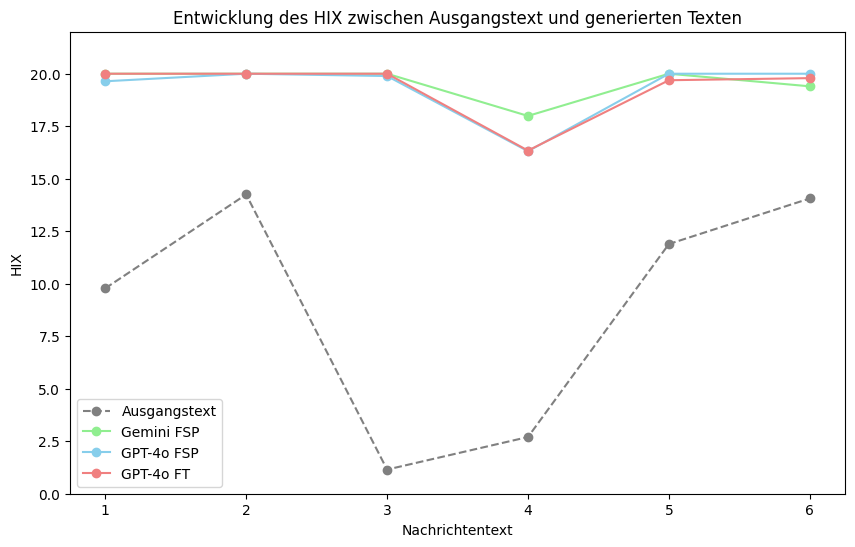

In [ ]:
# Extract the HIX values for the Ausgangstext from the correct file
hix_ausgangstext = evaluation_data['HIX_AT']
hix_gemini = evaluation_data['HIX_Gemini_FSP']
hix_gpt4_fsp = evaluation_data['HIX_GPT_FSP']
hix_gpt4_ft = evaluation_data['HIX_GPT_FT']

# Create an index representing each text for the x-axis
text_indices = range(1, len(hix_ausgangstext) + 1)

# Plot the HIX values for Ausgangstext, Gemini, GPT-4o FSP, and GPT-4o FT
plt.figure(figsize=(10, 6))

plt.plot(text_indices, hix_ausgangstext, marker='o', label='Ausgangstext', color='gray', linestyle='--')
plt.plot(text_indices, hix_gemini, marker='o', label='Gemini FSP', color='lightgreen')
plt.plot(text_indices, hix_gpt4_fsp, marker='o', label='GPT-4o FSP', color='skyblue')
plt.plot(text_indices, hix_gpt4_ft, marker='o', label='GPT-4o FT', color='lightcoral')

# Adding titles and labels
plt.title('Entwicklung des HIX zwischen Ausgangstext und generierten Texten')
plt.xlabel('Nachrichtentext')
plt.ylabel('HIX')
plt.ylim(0, max(max(hix_ausgangstext), max(hix_gemini), max(hix_gpt4_fsp), max(hix_gpt4_ft)) + 2)

# Show legend
plt.legend()

# Display the plot
plt.show()

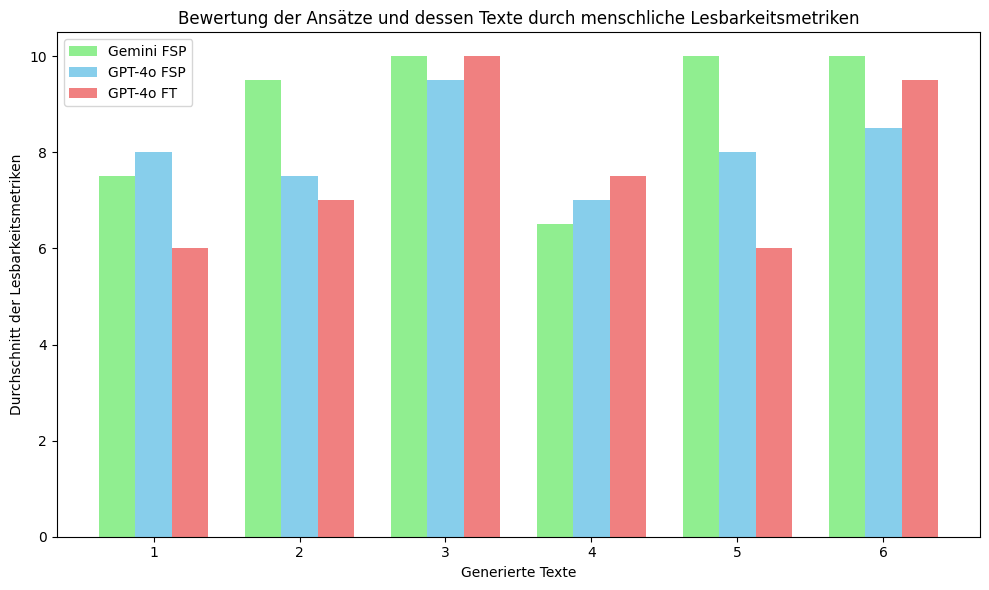

In [ ]:
# Extract the relevant data for the models
texts = evaluation_data['Ausgangstext']
gemini_scores = evaluation_data['Summe_MLF_Gemini_FSP']
gpt4o_fsp_scores = evaluation_data['Summe_MLF_GPT_FSP']
gpt4o_ft_scores = evaluation_data['Summe_MLF_GPT_FT']

# Limit the data to the first six texts (rows 0 to 5)
texts_limited = texts[:6]
gemini_scores_limited = gemini_scores[:6]
gpt4o_fsp_scores_limited = gpt4o_fsp_scores[:6]
gpt4o_ft_scores_limited = gpt4o_ft_scores[:6]

# Create a bar plot to compare the models' performances for the first six texts
plt.figure(figsize=(10, 6))

x = range(len(texts_limited))  # Number of texts (1-6)

# Plot the results for each model with specific colors
plt.bar(x, gemini_scores_limited, width=0.25, label='Gemini FSP', color='lightgreen', align='center')
plt.bar([p + 0.25 for p in x], gpt4o_fsp_scores_limited, width=0.25, label='GPT-4o FSP', color='skyblue', align='center')
plt.bar([p + 0.5 for p in x], gpt4o_ft_scores_limited, width=0.25, label='GPT-4o FT', color='lightcoral', align='center')

# Adjust the x-axis labels to display only numbers 1-6
plt.xlabel('Generierte Texte')
plt.ylabel('Durchschnitt der Lesbarkeitsmetriken')
plt.title('Bewertung der Ansätze und dessen Texte durch menschliche Lesbarkeitsmetriken')
plt.xticks([p + 0.25 for p in x], range(1, 7))

# Add legend
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()

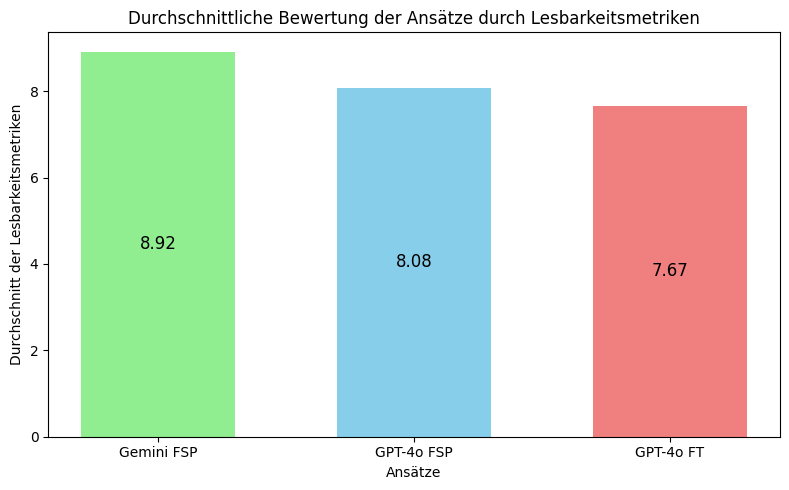

In [ ]:
import matplotlib.pyplot as plt

# Define colors for the bars
colors = ['lightgreen', 'skyblue', 'lightcoral']

# Calculate the average score for each model across all texts
average_gemini_score = gemini_scores.mean()
average_gpt4o_fsp_score = gpt4o_fsp_scores.mean()
average_gpt4o_ft_score = gpt4o_ft_scores.mean()

# Define model names and their corresponding average scores
models = ['Gemini FSP', 'GPT-4o FSP', 'GPT-4o FT']
average_scores = [average_gemini_score, average_gpt4o_fsp_score, average_gpt4o_ft_score]

# Create a bar plot to compare the models' average performance
plt.figure(figsize=(8, 5))

# Plot the average scores for each model with specific colors
bars = plt.bar(models, average_scores, color=colors, width=0.6)

# Add labels and titles
plt.xlabel('Ansätze')
plt.ylabel('Durchschnitt der Lesbarkeitsmetriken')
plt.title('Durchschnittliche Bewertung der Ansätze durch Lesbarkeitsmetriken')

# Display the average values inside the bars
for bar, score in zip(bars, average_scores):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval/2, f'{score:.2f}', ha='center', va='center', fontsize=12, color='black')

# Display the plot
plt.tight_layout()
plt.show()

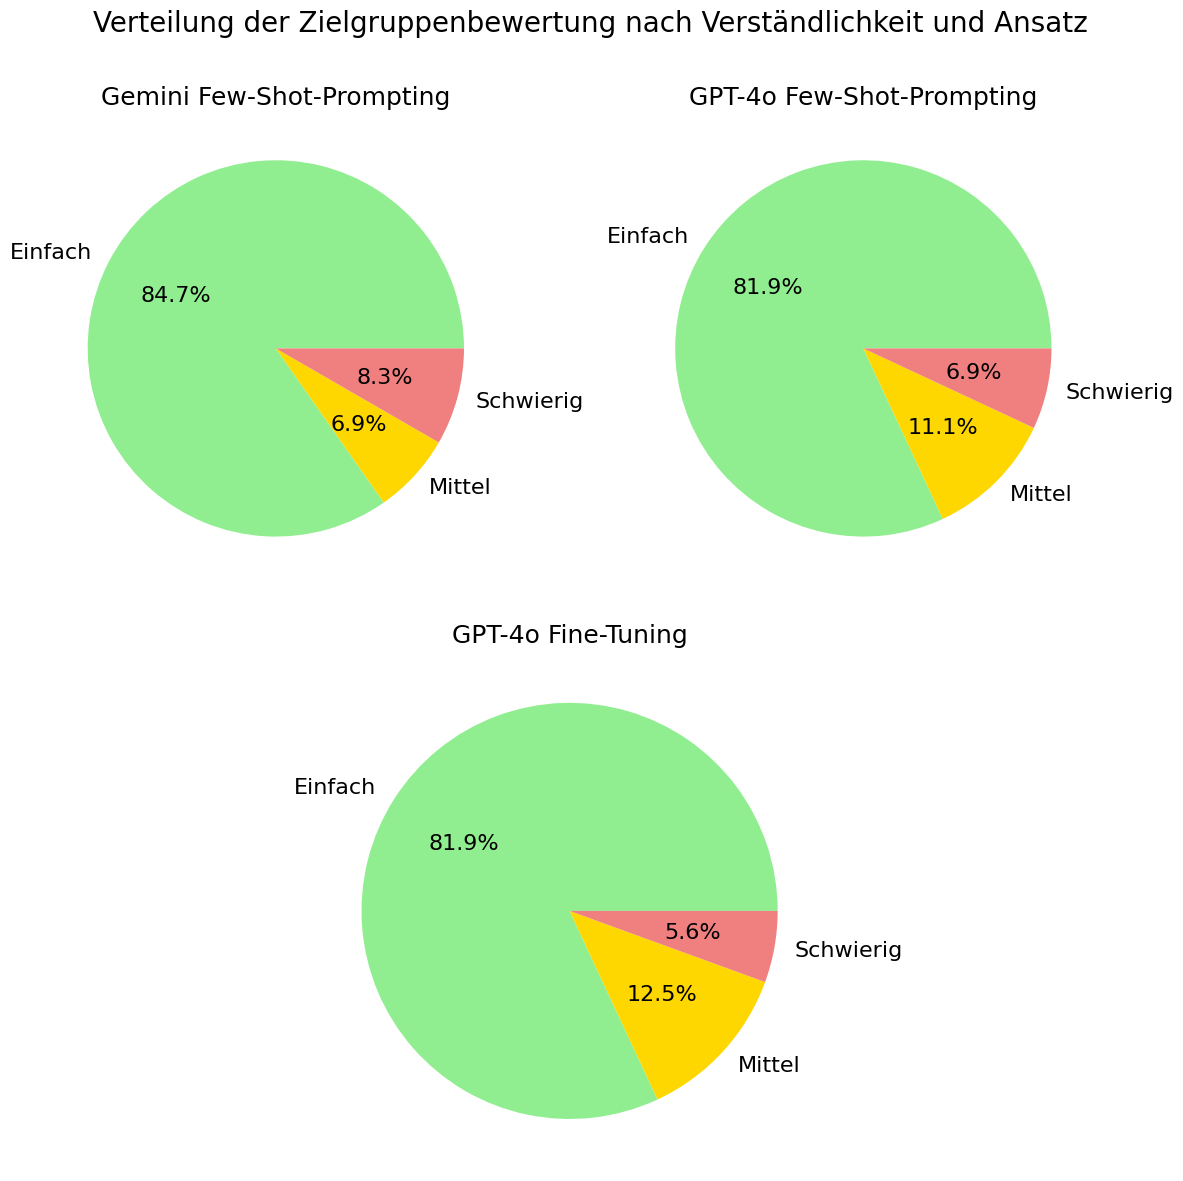

In [ ]:

# Grouping the columns based on the model and difficulty level for separate pie charts
gemini_columns = ['Gemini_Einfach', 'Gemini_ Mittel', 'Gemini_Schwierig']
gpt4_fsp_columns = ['GPT-4o_FSP_Einfach', 'GPT-4o_FSP_Mittel', 'GPT-4o_FSP_Schwierig']
gpt4_ft_columns = ['GPT-4o_FT_Einfach', 'GPT-4o_FT_Mittel', 'GPT-4o_FT_Schwierig']

# Summing the values across all rows for each group of columns
sums_gemini = evaluation_data[gemini_columns].sum()
sums_gpt4_fsp = evaluation_data[gpt4_fsp_columns].sum()
sums_gpt4_ft = evaluation_data[gpt4_ft_columns].sum()

# Defining constants
colors = ['lightgreen', 'gold', 'lightcoral']
labels = ['Einfach', 'Mittel', 'Schwierig']
text_size = 18

# Creating pie charts with a customized layout (two plots on top, one centered below)
fig = plt.figure(figsize=(12, 12))

# Pie chart for Gemini
ax1 = fig.add_subplot(2, 2, 1)
ax1.pie(sums_gemini, labels=labels, autopct='%1.1f%%', colors=colors, textprops={'fontsize': text_size-2})
ax1.set_title('Gemini Few-Shot-Prompting', fontsize=text_size)

# Pie chart for GPT-4o FSP
ax2 = fig.add_subplot(2, 2, 2)
ax2.pie(sums_gpt4_fsp, labels=labels, autopct='%1.1f%%', colors=colors, textprops={'fontsize': text_size-2})
ax2.set_title('GPT-4o Few-Shot-Prompting', fontsize=text_size)

# Pie chart for GPT-4o FT
ax3 = fig.add_subplot(2, 2, (3, 4))  # Use both cells in the second row
ax3.pie(sums_gpt4_ft, labels=labels, autopct='%1.1f%%', colors=colors, textprops={'fontsize': text_size-2})
ax3.set_title('GPT-4o Fine-Tuning', fontsize=text_size)

# Adjust layout to ensure everything fits well
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Title for the entire figure
plt.suptitle('Verteilung der Zielgruppenbewertung nach Verständlichkeit und Ansatz', fontsize=20)

# Display the plots
plt.show()

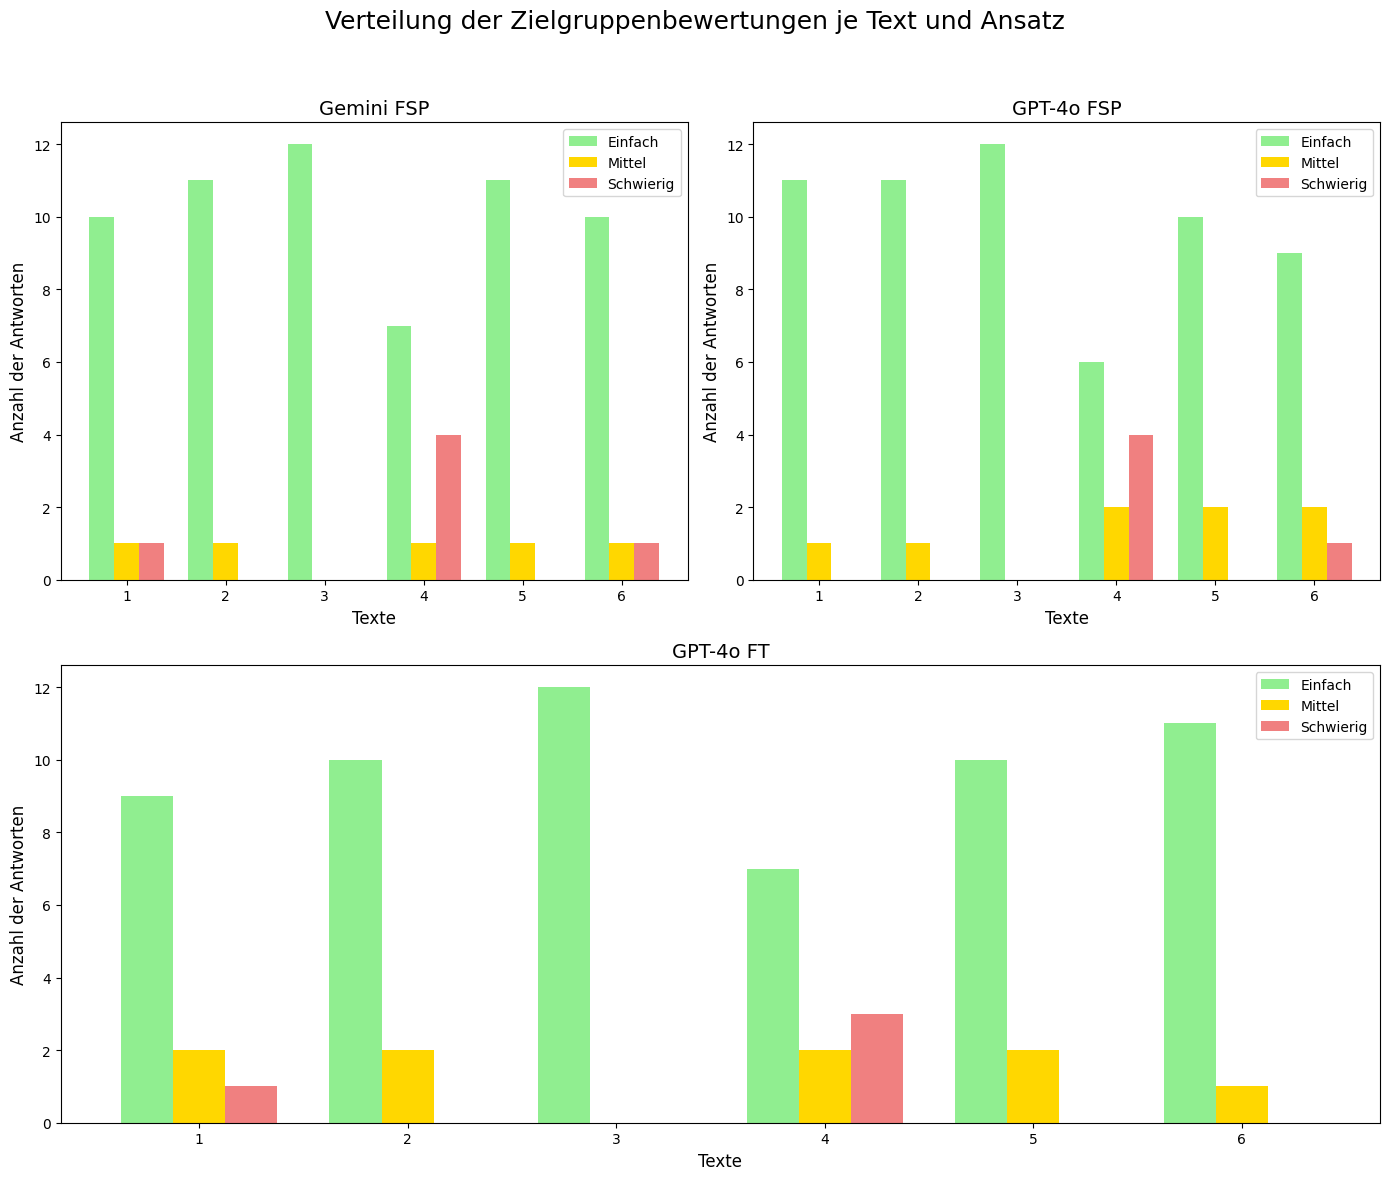

In [ ]:

# Extract the relevant data for the models
texts = evaluation_data['Ausgangstext']
gemini_easy = evaluation_data['Gemini_Einfach']
gemini_medium = evaluation_data['Gemini_ Mittel']
gemini_hard = evaluation_data['Gemini_Schwierig']

gpt4o_fsp_easy = evaluation_data['GPT-4o_FSP_Einfach']
gpt4o_fsp_medium = evaluation_data['GPT-4o_FSP_Mittel']
gpt4o_fsp_hard = evaluation_data['GPT-4o_FSP_Schwierig']

gpt4o_ft_easy = evaluation_data['GPT-4o_FT_Einfach']
gpt4o_ft_medium = evaluation_data['GPT-4o_FT_Mittel']
gpt4o_ft_hard = evaluation_data['GPT-4o_FT_Schwierig']

# Limit the data to the first six texts (rows 0 to 5)
texts_limited = texts[:6]
gemini_easy_limited = gemini_easy[:6]
gemini_medium_limited = gemini_medium[:6]
gemini_hard_limited = gemini_hard[:6]

gpt4o_fsp_easy_limited = gpt4o_fsp_easy[:6]
gpt4o_fsp_medium_limited = gpt4o_fsp_medium[:6]
gpt4o_fsp_hard_limited = gpt4o_fsp_hard[:6]

gpt4o_ft_easy_limited = gpt4o_ft_easy[:6]
gpt4o_ft_medium_limited = gpt4o_ft_medium[:6]
gpt4o_ft_hard_limited = gpt4o_ft_hard[:6]

# Set up the figure with a grid of 2x2 plots
fig = plt.figure(figsize=(14, 12))

# Text size for labels and titles
text_size = 12

# Define the positions for the bars
x = range(len(texts_limited))  # Number of texts (1-6)
bar_width = 0.25

# Plot 1: Gemini FSP (Top Left)
ax1 = fig.add_subplot(2, 2, 1)
ax1.bar(x, gemini_easy_limited, width=bar_width, label='Einfach', color='lightgreen')
ax1.bar([p + bar_width for p in x], gemini_medium_limited, width=bar_width, label='Mittel', color='gold')
ax1.bar([p + bar_width*2 for p in x], gemini_hard_limited, width=bar_width, label='Schwierig', color='lightcoral')
ax1.set_title('Gemini FSP', fontsize=text_size + 2)
ax1.set_xticks([p + bar_width for p in x])
ax1.set_xticklabels(range(1, 7))
ax1.set_xlabel('Texte', fontsize=text_size)
ax1.set_ylabel('Anzahl der Antworten', fontsize=text_size)
ax1.legend()

# Plot 2: GPT-4o FSP (Top Right)
ax2 = fig.add_subplot(2, 2, 2)
ax2.bar(x, gpt4o_fsp_easy_limited, width=bar_width, label='Einfach', color='lightgreen')
ax2.bar([p + bar_width for p in x], gpt4o_fsp_medium_limited, width=bar_width, label='Mittel', color='gold')
ax2.bar([p + bar_width*2 for p in x], gpt4o_fsp_hard_limited, width=bar_width, label='Schwierig', color='lightcoral')
ax2.set_title('GPT-4o FSP', fontsize=text_size + 2)
ax2.set_xticks([p + bar_width for p in x])
ax2.set_xticklabels(range(1, 7))
ax2.set_xlabel('Texte', fontsize=text_size)
ax2.set_ylabel('Anzahl der Antworten', fontsize=text_size)
ax2.legend()

# Plot 3: GPT-4o FT (Bottom, Centered)
ax3 = fig.add_subplot(2, 2, (3, 4))
ax3.bar(x, gpt4o_ft_easy_limited, width=bar_width, label='Einfach', color='lightgreen')
ax3.bar([p + bar_width for p in x], gpt4o_ft_medium_limited, width=bar_width, label='Mittel', color='gold')
ax3.bar([p + bar_width*2 for p in x], gpt4o_ft_hard_limited, width=bar_width, label='Schwierig', color='lightcoral')
ax3.set_title('GPT-4o FT', fontsize=text_size + 2)
ax3.set_xticks([p + bar_width for p in x])
ax3.set_xticklabels(range(1, 7))
ax3.set_xlabel('Texte', fontsize=text_size)
ax3.set_ylabel('Anzahl der Antworten', fontsize=text_size)
ax3.legend()

# Main title for the entire figure
plt.suptitle('Verteilung der Zielgruppenbewertungen je Text und Ansatz', fontsize=text_size + 6)

# Adjust layout to fit everything properly
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Display the plots
plt.show()